# Finding maps with computer vision and Jupyter notebooks 


What this notebook aims to cover 

- how to 'find' maps 
- how Jupyter notebook can help 
- It's not a full tutorial on all the methods involved

Using notebooks vs working 

In [ ]:
!pip install -q 'fastai<2.1' --upgrade
!pip install -U -q ipywidgets
!pip install -q pigeonXT-jupyter

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# The Dataset 

Newspaper navigator 

In [ ]:
!wget -O newspaper_maps.zip https://zenodo.org/record/4156510/files/newspaper_maps.zip?download=1

--2020-10-30 14:08:56--  https://zenodo.org/record/4156510/files/map_labels.csv?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22267 (22K) [text/plain]
Saving to: ‘map_labels.csv’

map_labels.csv      100%[===================>]  21.75K  --.-KB/s    in 0.04s   

2020-10-30 14:08:57 (594 KB/s) - ‘map_labels.csv’ saved [22267/22267]

--2020-10-30 14:08:57--  https://zenodo.org/record/4156510/files/newspaper_maps.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314305730 (300M) [application/octet-stream]
Saving to: ‘newspaper_maps.zip’

newspaper_maps.zip  100%[===================>] 299.75M  13.2MB/s    in 24s     

2020-10-30 14:09:22 (12.6 MB/s) - ‘newspaper_maps.zip’ saved [314305730/314305730]



In [ ]:
!unzip -q newspaper_maps.zip

In [ ]:
%matplotlib inline

In [ ]:
!unzip -q newspaper_maps.zip

Exploring our data

There are many nice features of Jupyter notebooks but a particularly useful one for us it the ability to easily view images. Since we'll be trying to use computer vision this will be particularly helpful. 

# Building interfaces aka GUI programming is hard 

GUI vs cli/code vs notebooks 

## 🧙🏽‍♀️ ipywidgets

- Interfaces for others?
- Interfaces for ourselves?

In [ ]:
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Image
from IPython.display import Image, display

In [ ]:
fdir = 'newspaper_maps/'
@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file,width=400,height=400))

interactive(children=(Dropdown(description='file', options=('dlc_fairymoss_ver01_data_sn83030313_00271743737_1…

![](https://i.imgflip.com/4ke5n4.jpg)

So it turns out a machine learning model wasn't a 100% accurate, who'd have thought!

Trying to filter these images into maps or not maps 

# Pragmatic annotation aka building training data without 💸
- how much data?
- what labels
- who should do the labeling (internal, crowdsourcing) 
- proof of concept 

## 🧙🏽‍♀️ Annotating in a notebook 

In [ ]:
from fastai.vision.all import *

In [ ]:
images = get_image_files('newspaper_maps')

In [ ]:
from pigeonXT import annotate
from IPython.display import display, Image
annotations = annotate(
      images[:20],
      options=['map','no_map'],
      display_fn=lambda filename: display(Image(filename,width=300,height=200))
    )

HTML(value='0 of 20 Examples annotated, Current Position: 0 ')

Output()

We may have already learned more about our data

In [ ]:
annotations

{Path('newspaper_maps/dlc_fairymoss_ver01_data_sn83030313_00271743737_1871030501_0687_000_2_99.jpg'): 'map',
 Path('newspaper_maps/dlc_dutch_ver02_data_sn85054468_0021110210A_1897082901_0566_000_2_99.jpg'): 'map',
 Path('newspaper_maps/dlc_davis_ver02_data_sn83030214_00206532427_1919081101_0314_002_2_98.jpg'): 'no_map',
 Path('newspaper_maps/mimtptc_gaylord_ver02_data_sn85033781_00296023802_1891071501_0204_000_2_99.jpg'): 'map',
 Path('newspaper_maps/curiv_hairgrass_ver01_data_sn93052786_print_1858120401_0094_000_2_96.jpg'): 'no_map',
 Path('newspaper_maps/whi_grace_ver01_data_sn85033139_00271769350_1881112401_0328_001_2_98.jpg'): 'map',
 Path('newspaper_maps/dlc_frenchbulldog_ver04_data_sn83045433_00280764140_1921020601_0551_011_2_96.jpg'): 'no_map',
 Path('newspaper_maps/mnhi_edina_ver01_data_sn90059522_00175033531_1890112301_0212_002_2_97.jpg'): 'no_map',
 Path('newspaper_maps/mthi_dollyvarden_ver01_data_sn85053090_00295861095_1912112201_0367_002_2_92.jpg'): 'no_map',
 Path('newspap

In [ ]:
df_labels = pd.DataFrame({'fname':list(annotations.keys()), 'label':list(annotations.values())})

In [ ]:
df_labels.head(3)

,fname,label
0,newspaper_maps/dlc_fairymoss_ver01_data_sn83030313_00271743737_1871030501_0687_000_2_99.jpg,map
1,newspaper_maps/dlc_dutch_ver02_data_sn85054468_0021110210A_1897082901_0566_000_2_99.jpg,map
2,newspaper_maps/dlc_davis_ver02_data_sn83030214_00206532427_1919081101_0314_002_2_98.jpg,no_map


In [ ]:
df_labels['label'].value_counts()

map       11
no_map     9
Name: label, dtype: int64

# fastai 

In [ ]:
dls = ImageDataLoaders.from_df(df_labels, fn_col='fname', label_col='label', valid_pct=0.2, item_tfms=Resize(256),bs=16, num_workers=0)

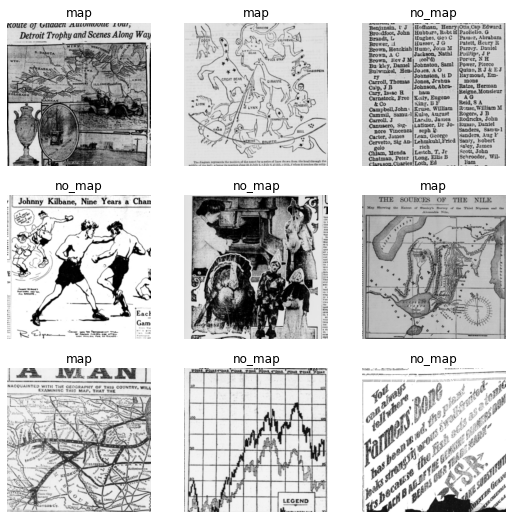

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy])

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.949650,1.047775,0.500000,00:06
1,0.919807,0.862727,0.500000,00:06
2,0.940733,0.718881,0.750000,00:07
3,0.895032,0.693018,0.500000,00:07
4,0.743382,0.643972,0.500000,00:07
5,0.627196,0.542487,0.500000,00:06
6,0.535358,0.528829,0.750000,00:06
7,0.473170,0.620589,0.750000,00:06
8,0.436458,0.701472,0.750000,00:06
9,0.396547,0.746303,0.750000,00:06


not too shabby for 20 labels 

# 🧙🏽‍♀️ Code reuse 
we might want to reuse things

In [ ]:
def setup_annotations(images, labels, num_annotations):
    from pigeonXT import annotate
    from IPython.display import display, Image
    return annotate(
      images[:num_annotations],
      options=labels,
      display_fn=lambda filename: display(Image(filename,width=300,height=200))
    )

In [ ]:
annotations = setup_annotations(images, ['map','no_map'],num_annotations=200)

HTML(value='0 of 200 Examples annotated, Current Position: 0 ')

Output()

In [ ]:
df_labels = pd.DataFrame({'fname':list(annotations.keys()), 'label':list(annotations.values())})

Make into a function

In [ ]:
#export 
def anno2df(annotations):
    """returns annotations from pigeon as a Pandas Dataframe"""
    return pd.DataFrame({'fname':list(annotations.keys()), 'label':list(annotations.values())})

# 🧙🏽‍♀️ Code reuse ++ 
We could make this into a library (https://nbdev.fast.ai/) 


## Creating a better model 

In [ ]:
!wget -O map_labels.csv https://zenodo.org/record/4156510/files/map_labels.csv?download=1

--2020-10-30 14:21:33--  https://zenodo.org/record/4156510/files/map_labels.csv?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22267 (22K) [text/plain]
Saving to: ‘map_labels.csv’

map_labels.csv      100%[===================>]  21.75K  --.-KB/s    in 0.03s   

2020-10-30 14:21:33 (763 KB/s) - ‘map_labels.csv’ saved [22267/22267]



In [ ]:
df_labels = pd.read_csv('map_labels.csv')

In [ ]:
dls = ImageDataLoaders.from_df(df_labels, fn_col='fname', label_col='label', valid_pct=0.2, item_tfms=Resize(128),bs=16, num_workers=0)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[F1Score(),accuracy])

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,f1_score,accuracy,time
0,1.795819,1.588962,0.000000,0.000000,00:02


In [ ]:
dls2 = ImageDataLoaders.from_df(df_labels, fn_col='fname', label_col='label', valid_pct=0.2, item_tfms=Resize(256), bs=16,
                                batch_tfms=aug_transforms(max_warp=0, p_affine=0, p_lighting=0), num_workers=0)

In [ ]:
learn.dls = dls2

In [ ]:
learn.fit_one_cycle(10, 1e-3)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

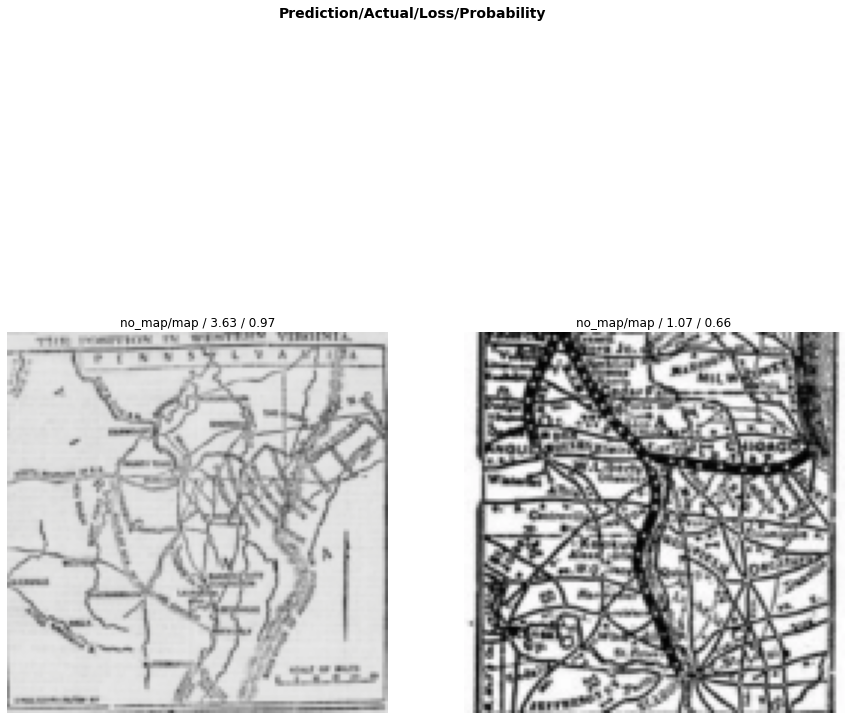

In [ ]:
interp.plot_top_losses(2, figsize=(15,15))

In [ ]:
learn.export()

In [ ]:
learn = load_learner('export.pkl')

Running inference  

,Unnamed: 0,fname,label
0,0,newspaper_maps/dlc_fairymoss_ver01_data_sn83030313_00271743737_1871030501_0687_000_2_99.jpg,map
1,1,newspaper_maps/dlc_dutch_ver02_data_sn85054468_0021110210A_1897082901_0566_000_2_99.jpg,map
2,2,newspaper_maps/dlc_davis_ver02_data_sn83030214_00206532427_1919081101_0314_002_2_98.jpg,no_map
3,3,newspaper_maps/mimtptc_gaylord_ver02_data_sn85033781_00296023802_1891071501_0204_000_2_99.jpg,map
4,4,newspaper_maps/curiv_hairgrass_ver01_data_sn93052786_print_1858120401_0094_000_2_96.jpg,no_map
...,...,...,...
219,219,newspaper_maps/dlc_klm_ver01_data_sn86053572_0023728902A_1870052401_0677_000_2_97.jpg,no_map
220,220,newspaper_maps/nbu_hoarypuccoon_ver01_data_sn83045652_00280778291_1914060501_0892_000_2_98.jpg,no_map
221,221,newspaper_maps/lu_pearse_ver01_data_sn82015753_0020219039A_1852070601_0649_000_2_92.jpg,no_map
222,222,newspaper_maps/ndhi_bajoran_ver01_data_sn85042243_0019991862A_1925100601_0634_001_2_92.jpg,no_map


In [ ]:
from IPython.display import display, Image

url_input = widgets.Text()

In [ ]:
url = 'https://news-navigator.labs.loc.gov/data/vi_blass_ver01/data/sn84024735/0041566431A/1850083001/0476/000_2_98.jpg'

In [ ]:
url_input

Text(value='')

In [ ]:
def load_image(url):
    with requests.get(url) as r:
        img = PILImage.create(io.BytesIO(r.content))
    return img

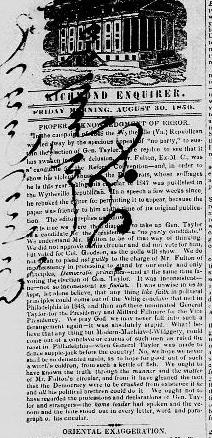

In [ ]:
load_image(url_input.value)

In [ ]:
pred,pred_idx,probs = learn.predict(load_image(url_input.value))
print(pred)

no_map


In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/9Q6sLbz37gk" frameborder="0" allowfullscreen></iframe>')